In [1]:
import numpy as np
import operator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv(r'D:\shinu\stockPredictor\News.csv', encoding = "ISO-8859-1")
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,text
0,Mozambique&#39;s president victorious in elect...
1,4 Oil &amp; Gas Stocks Likely to Surpass Q3 Ea...
2,CEO: Oxy to make further sales to pay down deb...
3,Consider This Global Energy ETF For Dividends
4,Brazil Oil Auction a âTotal Disasterâ as B...


In [3]:
dataset['text'].apply(lambda x: x.lower())
dataset['text'] = dataset['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]',"",x))
dataset['text'].head()

0    Mozambique39s president victorious in election...
1    4 Oil amp Gas Stocks Likely to Surpass Q3 Earn...
2    CEO Oxy to make further sales to pay down debt...
3        Consider This Global Energy ETF For Dividends
4    Brazil Oil Auction a Total Disaster as Bidders...
Name: text, dtype: object

In [4]:
tokenizer = Tokenizer(num_words=1000, split=" ")
tokenizer.fit_on_texts(dataset['text'].values)

X = tokenizer.texts_to_sequences(dataset['text'].values)
X = pad_sequences(X, maxlen=19)
X[:7]

array([[  0,   0,   0,   0,   0,   0,   0,   0, 138,  65, 139,   4, 140,
        141, 142],
       [  0,   0,   0,   0,  66,   2,  30,  10,   8,  67,   1,  68,   6,
         14,  15],
       [  0,   0,   0, 143,  44,   1, 144, 145,  69,   1, 146, 147, 148,
        149, 150],
       [  0,   0,   0,   0,   0,   0,   0,   0, 151, 152, 153,  31,  45,
          3, 154],
       [  0,   0,   0,   0,   0, 155,   2, 156,  11,   7, 157,  21, 158,
        159, 160],
       [  0,   0,   0,   0,   0,   0,   0,   0,  22,  70, 161,   8,   3,
        162, 163],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 164, 165,   8,  23,
        166, 167]])

In [5]:
model = load_model(r'D:\shinu\stockPredictor\Sentiment_Model.h5')

W1107 22:13:52.979034  3724 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1107 22:13:53.003972  3724 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1107 22:13:53.016931  3724 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1107 22:13:53.017929  3724 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1107 22:13:53.029900  3724 deprecation.py:506] From D:\Anaconda3\lib\site-packages\keras\bac

In [6]:
prediction = model.predict(X)
news=[]
label=[]
for i in range(0,dataset.shape[0]):
    news.append(dataset['text'][i])
    if(max(enumerate(prediction[i]), key=operator.itemgetter(1))[0]==0):
        label.append("1")
    elif(max(enumerate(prediction[i]), key=operator.itemgetter(1))[0]==1):
        label.append("0")
    elif(max(enumerate(prediction[i]), key=operator.itemgetter(1))[0]==2):
        label.append("-1")
dict = {'headline': news, 'label': label}
df = pd.DataFrame(dict)
df.to_csv(r'D:\shinu\stockPredictor\newsSentiments.csv', index=False) 
df.to_csv(r'D:\shinu\stockPredictor\newsSentimentsCollection.csv', mode='a', header=None, index=False)

In [7]:
dataset = pd.read_csv(r'D:\shinu\stockPredictor\newsSentimentsCollection.csv', encoding = "ISO-8859-1")
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,headline,label
0,Saudi Aramco finally launches longawaited megaIPO,0
1,Exxon39s climate change fraud trial to wrap up...,-1
2,Consider This Global Energy ETF For Dividends,1
3,Is Schwab Fundamental US Broad Market Index ET...,-1
4,The Zacks Analyst Blog Highlights Verizon Comm...,1


In [8]:
dataset.shape

(393, 2)

In [9]:
dataset = dataset[['label','headline']]
dataset.head()

,label,headline
0,0,Saudi Aramco finally launches longawaited megaIPO
1,-1,Exxon39s climate change fraud trial to wrap up...
2,1,Consider This Global Energy ETF For Dividends
3,-1,Is Schwab Fundamental US Broad Market Index ET...
4,1,The Zacks Analyst Blog Highlights Verizon Comm...


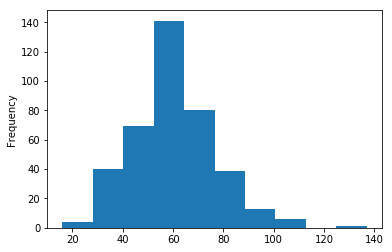

In [10]:
%matplotlib inline
dataset['headline'].str.len().plot.hist()

In [11]:
dataset['label'].value_counts()

 1    193
-1    166
 0     34
Name: label, dtype: int64

In [12]:
dataset['label'].value_counts()

 1    193
-1    166
 0     34
Name: label, dtype: int64

In [13]:
dataset['headline'].apply(lambda x: x.lower())
dataset['headline'] = dataset['headline'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]',"",x))
dataset['headline'].head()

0    Saudi Aramco finally launches longawaited megaIPO
1    Exxon39s climate change fraud trial to wrap up...
2        Consider This Global Energy ETF For Dividends
3    Is Schwab Fundamental US Broad Market Index ET...
4    The Zacks Analyst Blog Highlights Verizon Comm...
Name: headline, dtype: object

In [14]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(dataset['headline'].values)

X = tokenizer.texts_to_sequences(dataset['headline'].values)
X = pad_sequences(X)
X[:7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24,  20, 187, 188, 189, 190],
       [  0,   0,   0,   0,   0,   0,   0,   0, 191,  89,  90,  91,  54,
          1,  92,  28,   4,  17,  76],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 192,
        144, 145,  38,  51,   2, 193],
       [  0,   0,   0,   0,   0,  19, 194, 195,  39, 196,  55, 197,  51,
        198,   8,  77,  51, 146,  48],
       [  0,   0,   0,   0,   0,   0,   0,   5,  30,  13,  31,  32,  93,
        199,  94,  10, 200,   6,  78],
       [  0,   0,   0,   0,   0,   0,   0,  14, 201,  89,  90,  91,  54,
          1,  92,  28,   4,  17,  76],
       [  0,   0,   0,   0,   0,   0, 147, 504, 505,  25, 506, 507,  51,
        508, 509,  12, 510, 511, 512]])

In [15]:
X.shape

(393, 19)

In [16]:
model = Sequential()
model.add(Embedding(5000, 256, input_length = X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout = 0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout = 0.3, recurrent_dropout =0.2))
model.add(Dense(3, activation = 'softmax'))

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 19, 256)           1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 19, 256)           525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [18]:
y = pd.get_dummies(dataset['label']).values
[print(dataset['label'][i], y[i]) for i in range(0,7)]

0 [0 1 0]
-1 [1 0 0]
1 [0 0 1]
-1 [1 0 0]
1 [0 0 1]
1 [0 0 1]
0 [0 1 0]


[None, None, None, None, None, None, None]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [20]:
X_test[:7]

array([[  0,   0,   0,   0,   0,   0,   0,  37,  42,  34,  43,  44,  45,
        106,   5, 107, 108,  57, 109],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25,  13,
         23,   2, 377, 378, 379, 380],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 307,   3, 308,   8,
         10, 309,  21, 310, 311, 312],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 386, 186, 387,
          9,  15, 119, 388,  28, 389],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25,  16,  23,   2,
         39, 405, 406, 407, 143, 408],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 400, 401, 402,  12,
        403, 142, 404,   6,  38,   7],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 307,   3, 308,   8,
         10, 309,  21, 310, 311, 312]])

In [21]:
batch_size = 64
epochs = 50
model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, verbose=2)
scores=model.evaluate(X_test,y_test, verbose=2)
print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/50
 - 3s - loss: 1.0600 - acc: 0.4554
Epoch 2/50
 - 1s - loss: 0.9389 - acc: 0.5096
Epoch 3/50
 - 1s - loss: 0.9306 - acc: 0.4618
Epoch 4/50
 - 1s - loss: 0.8995 - acc: 0.4968
Epoch 5/50
 - 1s - loss: 0.8101 - acc: 0.6401
Epoch 6/50
 - 1s - loss: 0.7027 - acc: 0.7389
Epoch 7/50
 - 1s - loss: 0.5741 - acc: 0.7452
Epoch 8/50
 - 1s - loss: 0.4830 - acc: 0.8185
Epoch 9/50
 - 1s - loss: 0.4534 - acc: 0.8025
Epoch 10/50
 - 1s - loss: 0.4467 - acc: 0.7898
Epoch 11/50
 - 1s - loss: 0.4179 - acc: 0.8057
Epoch 12/50
 - 1s - loss: 0.4243 - acc: 0.7930
Epoch 13/50
 - 1s - loss: 0.3984 - acc: 0.8089
Epoch 14/50
 - 1s - loss: 0.3725 - acc: 0.8280
Epoch 15/50
 - 1s - loss: 0.4211 - acc: 0.7962
Epoch 16/50
 - 1s - loss: 0.4093 - acc: 0.7930
Epoch 17/50
 - 1s - loss: 0.4153 - acc: 0.7962
Epoch 18/50
 - 1s - loss: 0.3851 - acc: 0.8057
Epoch 19/50
 - 1s - loss: 0.3626 - acc: 0.8089
Epoch 20/50
 - 1s - loss: 0.3867 - acc: 0.8057
Epoch 21/50
 - 1s - loss: 0.3720 - acc: 0.7930
Epoch 22/50
 - 1s - lo

In [22]:
model.save(r'D:\shinu\stockPredictor\Sentiment_Model.h5')

In [23]:
prediction = model.predict(X_test)

#[print(dataset['text'][i], prediction[i], y_test[i]) for i in range(0,7)]
for i in range(0,7):
    print(dataset['headline'][i])
    if(max(enumerate(prediction[i]), key=operator.itemgetter(1))[0]==0):
        print("POSITIVE")
    elif(max(enumerate(prediction[i]), key=operator.itemgetter(1))[0]==1):
        print("NEUTRAL")
    elif(max(enumerate(prediction[i]), key=operator.itemgetter(1))[0]==2):
        print("NEGATIVE")

Saudi Aramco finally launches longawaited megaIPO
POSITIVE
Exxon39s climate change fraud trial to wrap up in New York
NEGATIVE
Consider This Global Energy ETF For Dividends
NEGATIVE
Is Schwab Fundamental US Broad Market Index ETF FNDB a Strong ETF Right Now
NEGATIVE
The Zacks Analyst Blog Highlights Verizon Communications McDonald39s TOTAL Broadcom and UPS
POSITIVE
UPDATE 1Exxon39s climate change fraud trial to wrap up in New York
NEGATIVE
Should iShares Russell Top 200 Value ETF IWX Be on Your Investing Radar
NEGATIVE
